In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_jlcp = pd.read_excel("/Users/satoshan/Library/CloudStorage/GoogleDrive-sato41kawa0707@gmail.com/マイドライブ/scan_org_charts/data/JLCP/jlcp2021.xlsx")
df_org = pd.read_csv("/Users/satoshan/Library/CloudStorage/GoogleDrive-sato41kawa0707@gmail.com/マイドライブ/scan_org_charts/data/Org_chart/clean/org_data.csv")
df_jlcp=df_jlcp.rename(columns={'Performance year': 'year'}).rename(columns={'Stock code': 'code'})
df_merged = pd.merge(df_org, df_jlcp, on=['code', 'year'], how='inner')
df_merged["hierarchy"] = df_merged['shortest_path_length'] + 1
df_merged.to_csv("/Users/satoshan/Library/CloudStorage/GoogleDrive-sato41kawa0707@gmail.com/マイドライブ/scan_org_charts/data/Org_chart/clean/data.csv")

Text(0.5, 1.0, 'Histogram of Hierarchy')

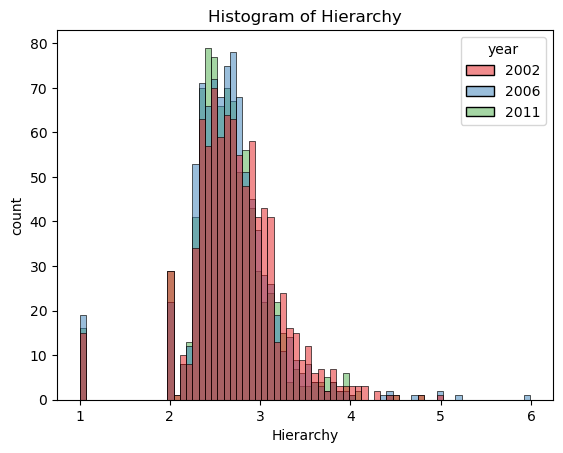

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

years = df_merged["year"].unique()
years.sort()

fig, ax = plt.subplots(1,1,dpi = 100)
ax = sns.histplot(
  data = df_merged,
  x = "hierarchy",
  hue="year",
  palette='Set1'
)
ax.set_xlabel("Hierarchy")
ax.set_ylabel("count")
ax.set_title("Histogram of Hierarchy")


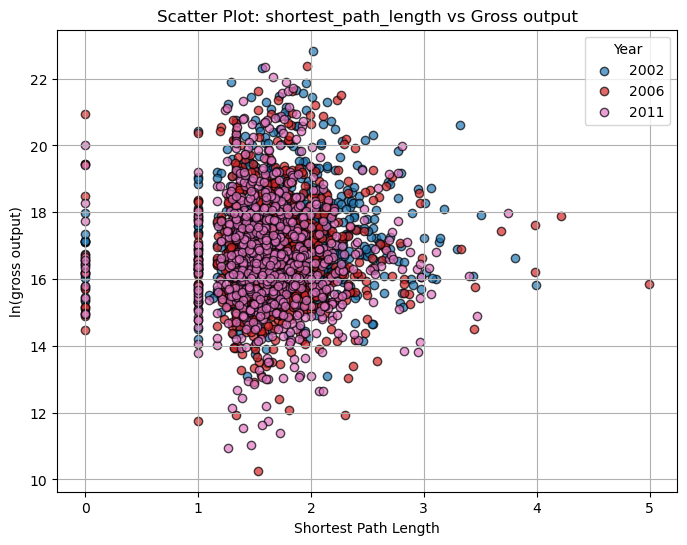

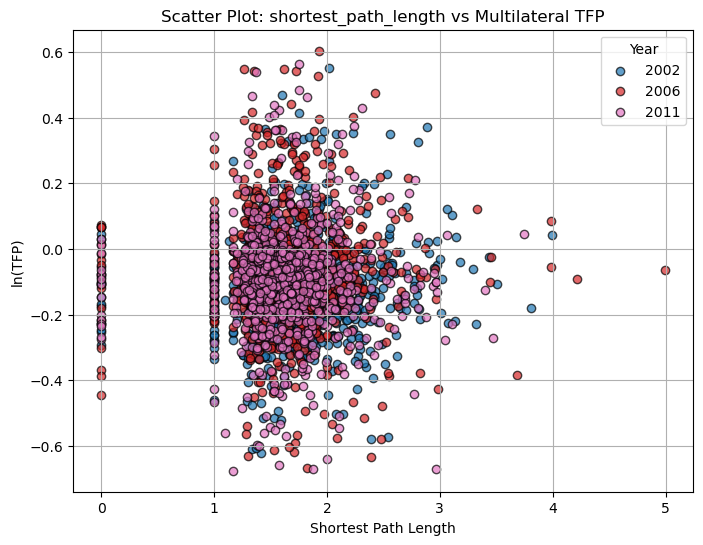

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function for scatter plot with year-based color mapping
def plot_scatter(x, y, x_label, y_label, title, df):
    plt.figure(figsize=(8, 6))

    years = df["year"].unique()
    cmap = plt.get_cmap("tab10") 

    for i, year in enumerate(sorted(years)):
        subset = df[df["year"] == year]
        plt.scatter(subset[x], subset[y], alpha=0.7, edgecolors='k', label=str(year), color=cmap(i / len(years)))

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title="Year")
    plt.grid(True)
    plt.show()

# Gross output
plot_scatter(
    "shortest_path_length",
    "ln(gross output)",
    "Shortest Path Length",
    "ln(gross output)",
    "Scatter Plot: shortest_path_length vs Gross output",
    df_merged
)

# TFP
plot_scatter(
    "shortest_path_length",
    "Multilateral TFP, base year=2011, industry=JIPcode",
    "Shortest Path Length",
    "ln(TFP)",
    "Scatter Plot: shortest_path_length vs Multilateral TFP",
    df_merged
)
